# Dissertation using US Core Fundamentals Dataset - Second Model

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats

C:\Users\Selim\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

In [2]:
#importing dataset
data = pd.read_csv('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\US Core\\US Core.csv')
data.head(5)

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,31/03/2015,05/06/2015,30/04/2015,01/06/2020,-270000000.0,7.412000e+09,NaN,3.620000e+09,...,333191751.0,334000000.0,337000000.0,2.883,4.555000e+09,0.0,8000000.0,0.0,13.638,2.690000e+09
1,A,ARQ,30/06/2015,02/09/2015,31/07/2015,01/06/2020,-332000000.0,7.251000e+09,NaN,3.478000e+09,...,331403231.0,332000000.0,334000000.0,3.054,4.401000e+09,0.0,23000000.0,0.0,13.256,2.625000e+09
2,A,ARQ,30/09/2015,21/12/2015,31/10/2015,01/06/2020,-391000000.0,7.479000e+09,NaN,3.686000e+09,...,332170890.0,330000000.0,332000000.0,3.136,4.668000e+09,0.0,0.0,0.0,14.145,2.710000e+09
3,A,ARQ,31/12/2015,08/03/2016,31/01/2016,01/06/2020,-438000000.0,7.302000e+09,NaN,3.399000e+09,...,327770081.0,329000000.0,332000000.0,3.125,4.311000e+09,0.0,19000000.0,0.0,13.103,2.452000e+09
4,A,ARQ,31/03/2016,07/06/2016,30/04/2016,01/06/2020,-299000000.0,7.640000e+09,NaN,3.488000e+09,...,325521700.0,326000000.0,328000000.0,3.126,4.594000e+09,0.0,26000000.0,0.0,14.092,2.355000e+09


In [3]:
#converting calendar dates from string to dates using datetime function
data['calendardate'] = pd.to_datetime(data['calendardate'], format="%d/%m/%Y")

# Creating dataframes for time-series analysis and smoothing

## Final Dataframe to store predictor variables

In [4]:
#creating numpy array of unique stock tickers which will represent each stock in the dataset
ticker_list = data.ticker.unique()
ticker_list

array(['A', 'AA', 'AAAP', ..., 'ERES', 'UDFI', 'ACEV'], dtype=object)

In [5]:
#creating empty dataframe with the index as the unique stock tickers

final = pd.DataFrame(index = ticker_list)

In [6]:
final.head()

""
A
AA
AAAP
AACG
AAL


# Extracting Separate Financial Accounts

In [7]:
def ExtractFinAccount(column):
    #creating revenue table from full dataset from independant time-series analysis
    account = data[["ticker", "dimension", "calendardate", column]].copy()
    
    #selecting rows of data where dimension is equal to ARQ, which are rows of data for quarterly financial reporting of 
    #companies without financial restatements.
    #change later to including restatements and explain why that is better from fundamental analysis perspective.
    account = account[account.dimension.str.contains('ARQ')==True]
    
    #deleting dimension column as it is no longer needed
    del account["dimension"]
    
    #using pivot table to get reshape revenue dataframe to have revenue as the values, ticker as the index and dates on the
    #columns
    account = account.pivot_table(values=column, index='ticker', columns='calendardate')
    
    return account

In [8]:
def ExtractFinAccount2(column):
    #creating revenue table from full dataset from independant time-series analysis
    account = data[["ticker", "dimension", "calendardate", column]].copy()
    
    #selecting rows of data where dimension is equal to ARY, which are rows of data for annual financial reporting of 
    #companies without financial restatements.
    account = account[account.dimension.str.contains('ARY')==True]
    
    #deleting dimension column as it is no longer needed
    del account["dimension"]
    
    #using pivot table to get reshape revenue dataframe to have revenue as the values, ticker as the index and dates on the
    #columns
    account = account.pivot_table(values=column, index='ticker', columns='calendardate')
    
    return account

In [9]:
#extractions

#operating income
oi = ExtractFinAccount('opinc')

#net income
ni = ExtractFinAccount('netinc')

#net cash flow from operations
ncfo = ExtractFinAccount('ncfo')

#free cash flow per share
fcfps = ExtractFinAccount('fcfps')

#ros
ros = ExtractFinAccount2('ros')

#roe
roe = ExtractFinAccount2('roe')

#roa
roa = ExtractFinAccount2('roa')

#asset turnover
at = ExtractFinAccount2('assetturnover')

#book value per share
bvps = ExtractFinAccount('bvps')

#investments
inv = ExtractFinAccount('investments')

#current debt
dbtc = ExtractFinAccount('debtc')

#debt to equity ratio
de = ExtractFinAccount('de')

#current ratio
cr = ExtractFinAccount('currentratio')

#working capital
wc = ExtractFinAccount('workingcapital')

#dividends per basic common share
dps = ExtractFinAccount('dps')

#dividend yield
dy = ExtractFinAccount('divyield')

#payout ratio
pay = ExtractFinAccount('payoutratio')

#payment of dividends & other cash distributions
payd = ExtractFinAccount('ncfdiv')

#operating expenses
opex = ExtractFinAccount('opex')

#earnings per diluted share
epds = ExtractFinAccount('epsdil')

#total assets
assets = ExtractFinAccount('assets')

#inventory
invt = ExtractFinAccount('inventory')

#total liabilities
liab = ExtractFinAccount('liabilities')

#ebitda margin
ebitdam = ExtractFinAccount('ebitdamargin')

#invested capital
invcap = ExtractFinAccount('invcap')

#return on invested capital
roic = ExtractFinAccount2('roic')

#sales per share
sps = ExtractFinAccount('sps')

#price to earnings ratio
pe = ExtractFinAccount('pe1')

#price to sales ratio
ps = ExtractFinAccount('ps1')

#price to book ratio
pb = ExtractFinAccount('pb')

#market capitalization
marcap = ExtractFinAccount('marketcap')

# Checking for & Deleting Missing Values

In [10]:
def MissingValues(df):
    
    #dropping data for 2020 since there is insufficient data coverage for the companies in the dataset
    del df["2020-03-31"]
    del df["2020-06-30"]
    
    #checking for rows of data where there is missing values across all columns
    df.isna().sum()
    
    #dropping rows of data where there is missing values since it cannot be replaced with an algorithm due to its sensitivity
    df = df.dropna()
    
    #dropping rows of data where there is a missing value indicated with a zero
    df = df[(df != 0).all(1)]
    
    return df

In [11]:
def MissingValues2(df):
    
    #dropping data for 2020 since there is insufficient data coverage for the companies in the dataset
    del df["2020-12-31"]
    
    #checking for rows of data where there is missing values across all columns
    df.isna().sum()
    
    #dropping rows of data where there is missing values since it cannot be replaced with an algorithm due to its sensitivity
    df = df.dropna()
    
    #dropping rows of data where there is a missing value indicated with a zero
    df = df[(df != 0).all(1)]
    
    return df

In [12]:
#deleting missing values

#operating income
oi = MissingValues(oi)

#net income
ni = MissingValues(ni)

#net cash flow from operations
ncfo = MissingValues(ncfo)

#free cash flow per share
fcfps = MissingValues(fcfps)

#return on sales
ros = MissingValues2(ros)

#return on equity
roe = MissingValues2(roe)

#return on assets
roa = MissingValues2(roa)

#asset turnover
at = MissingValues2(at)

#book value per share
bvps = MissingValues(bvps)

#investments
inv = MissingValues(inv)

#current debt
dbtc = MissingValues(dbtc)

#debt to equity ratio
de = MissingValues(de)

#current ratio
cr = MissingValues(cr)

#working capital
wc = MissingValues(wc)

#dividends per share
dps = MissingValues(dps)

#dividend yield
dy = MissingValues(dy)

#payout ratio
pay = MissingValues(pay)

#payment of dividends & other cash distributions
payd = MissingValues(payd)

#operating expenses
opex = MissingValues(opex)

#earnings per diluted share
epds = MissingValues(epds)

#total assets
assets = MissingValues(assets)

#inventory
invt = MissingValues(invt)

#total liabilities
liab = MissingValues(liab)

#ebitda margin
ebitdam = MissingValues(ebitdam)

#invested capital
invcap = MissingValues(invcap)

#return on invested capital
roic = MissingValues2(roic)

#sales per share
sps = MissingValues(sps)

#price to earnings ratio
pe = MissingValues(pe)

#price to sales ratio
ps = MissingValues(ps)

#price to book ratio
pb = MissingValues(pb)

#market capitalization
marcap = MissingValues(marcap)

In [13]:
#checking results on the price to book dataframe
pb.head()

calendardate,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31
ticker,,,,,,,,,,,,,,,,,,,,
A,3.230,2.870,3.255,3.086,3.578,3.5190,3.504,3.856,4.417,4.519,4.515,4.857,4.295,4.698,4.547,5.028,4.124,4.636,5.521,5.130
AAL,13.211,7.322,7.652,4.351,4.690,4.4680,4.790,6.170,6.267,6.619,5.892,6.361,-19.485,-21.208,-26.248,-95.391,-23.123,-640.987,80.521,-102.290
AAMC,-2.991,-1.452,-0.308,-0.185,-0.170,-0.1195,-0.293,-0.585,-0.617,-0.700,-0.655,-0.531,-0.527,-0.557,-0.408,-0.279,-0.186,-0.086,-0.104,-0.166
AAME,0.726,0.710,0.977,0.824,0.778,0.7690,0.693,0.755,0.677,0.618,0.672,0.587,0.598,0.478,0.632,0.520,0.442,0.438,0.309,0.415
AAN,1.969,2.023,1.342,1.221,1.310,1.1950,1.216,1.312,1.757,2.127,1.760,1.884,1.696,1.937,1.707,2.053,2.204,2.281,2.656,1.746


# Feature Engineering

## Target Variable

In [14]:
#creating new dataframe to store stock prices
target = ExtractFinAccount('price')

In [15]:
#extracting the two years required to make the target variable calculation
target19 = target['2019-12-31'].copy()
target18 = target['2018-12-31'].copy()

In [16]:
#calculating difference in stock value between 2019 and 2018
target = pd.DataFrame(target19-target18)

#dropping rows with missing values before calculation of target variable
target = target.dropna()

In [17]:
#checking how many non-null values are available for stock prices in the dataset
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4251 entries, A to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4251 non-null   float64
dtypes: float64(1)
memory usage: 66.4+ KB


In [18]:
#changing dataframe column name
target.columns = ['Stock Price % Change']

In [19]:
#Determining whether share price experienced growth or decline in 2019.
#Shares that have experienced growth in value will be labelled as "1" and declining shares will be labelled as "0".

lst = []
for x in target['Stock Price % Change']:
    if x > 0:
        lst.append('1')
    else:
        lst.append('0')

#creating new column insinde dataframe to store newly created feature
target['Stock Price y-o-y Movement'] = lst

In [20]:
#creating new empty dataframe for target variable
label = pd.DataFrame(index = ticker_list, columns = ['Stock Price y-o-y Movement'])

In [21]:
#adding results from creation of target variable to new dataframe
label['Stock Price y-o-y Movement'] = target['Stock Price y-o-y Movement']

In [22]:
# dropping rows with missing values from dataframe
label = label.dropna()

In [23]:
label.head()

,Stock Price y-o-y Movement
A,1
AA,0
AAL,0
AAMC,0
AAME,0


In [24]:
#copying created target variable to the final dataframe as 'Class'
final['Class'] = label.copy()

# Exponential Smoothing

# Decaying Exponential Moving Average

Specify decay in terms of half-life, α=1−exp(−ln(2)/halflife), for halflife>0.

If times is specified, the time unit (str or timedelta) over which an observation decays to half its value. Only applicable to mean() and halflife value will not apply to the other functions.

Minimum number of observations in window required to have a value (otherwise result is NA).

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

When adjust=True (default), the EW function is calculated using weights wi=(1−α)i. For example, the EW moving average of the series [x0,x1,...,xt] would be:

yt=xt+(1−α)xt−1+(1−α)2xt−2+...+(1−α)tx01+(1−α)+(1−α)2+...+(1−α)t

When adjust=False, the exponentially weighted function is calculated recursively:

y0yt=x0=(1−α)yt−1+αxt,

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
def EWM(stock, stock_name, df):
    
    #converting each company into separate time series dataframe
    stock = pd.DataFrame(df.loc[stock_name])
    
    #applying first differences technique to make time series data stationary
    stock = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 4
    stock_ema = stock.ewm(halflife=4, min_periods = 0, adjust = True).mean()
       
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 19)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 19)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()
    
    return slope

In [27]:
def EWMAnnual(stock, stock_name, df):
    
    #converting each company into separate time series dataframe
    stock = pd.DataFrame(df.loc[stock_name])
    
    #applying first differences technique to make time series data stationary
    stock = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 1 instead of 4 to adjust to annual time series data
    stock_ema = stock.ewm(halflife=1, min_periods = 0, adjust = True).mean()
       
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 4)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 4)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()
    
    return slope

In [28]:
def RunEWM(df):
    
    results_list = []
    
    for ind, row in df.iterrows():
        results_list.append(EWM(ind, ind, df))
        
    ticker_list = df.index.unique()
    
    df = pd.DataFrame(results_list, index = ticker_list)
    
    return df

In [29]:
def RunEWMAnnual(df):
    
    results_list = []
    
    for ind, row in df.iterrows():
        results_list.append(EWMAnnual(ind, ind, df))
        
    ticker_list = df.index.unique()
    
    df = pd.DataFrame(results_list, index = ticker_list)
    
    return df

In [30]:
def EWMPlot(stock_name, df):
    
    stock = pd.DataFrame(df.loc[stock_name])
    
    stock_orig = stock.copy()
    
    #applying first differences technique to make time series data stationary
    stock_diff = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 4
    stock_ema = stock_diff.ewm(halflife=4, min_periods = 0, adjust = True).mean()
    
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 19)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 19)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()

    plt.figure(figsize = (22, 8))
    #plt.plot(stock_orig, label = 'Original')
    plt.plot(stock_diff, label = 'First Differences')
    plt.plot(stock_ema, label = 'EWM')
    plt.legend(loc = 'best', fontsize = 'xx-large')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.show()

In [31]:
def EWMPlotAnnual(stock_name, df):
    
    stock = pd.DataFrame(df.loc[stock_name])
    
    stock_orig = stock.copy()
    
    #applying first differences technique to make time series data stationary
    stock_diff = stock.diff().dropna()
    
    #applying exponential weighted average with a half-life of 1
    stock_ema = stock_diff.ewm(halflife=4, min_periods = 0, adjust = True).mean()
    
    #creating separate array for time periods and for ema results
    dates = np.array([0, 1, 2, 3])
    ema = stock_ema.values
    
    #transforming both arrays into the same type and shape for application of linear regression and extraction of slope
    dates = dates.astype(np.float64)
    dates = dates.reshape(1, 4)
    ema = ema.astype(np.float64)
    ema = ema.reshape(1, 4)
        
    #linear regression and extraction of slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(dates, ema)
    
    ticker_list = df.index.unique()

    plt.figure(figsize = (22, 8))
    #plt.plot(stock_orig, label = 'Original')
    plt.plot(stock_diff, label = 'First Differences')
    plt.plot(stock_ema, label = 'EWM')
    plt.legend(loc = 'best', fontsize = 'xx-large')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.show()

In [32]:
#OPTION 1

#running EWM for all features with quarterly time-series data

final['OI'] = RunEWM(oi)
final['NI'] = RunEWM(ni)
final['NCFO'] = RunEWM(ncfo)
final['FCFPS'] = RunEWM(fcfps)
final['BVPS'] = RunEWM(bvps)
final['DE'] = RunEWM(de)
final['OPEX'] = RunEWM(opex)
final['EPDS'] = RunEWM(epds)
final['ASSETS'] = RunEWM(assets)
final['LIAB'] = RunEWM(liab)
final['INVCAP'] = RunEWM(invcap)
final['EBITDAM'] = RunEWM(ebitdam)
final['SPS'] = RunEWM(sps)
final['PE'] = RunEWM(pe)
final['PS'] = RunEWM(ps)
final['PB'] = RunEWM(pb)
final['ROS'] = RunEWMAnnual(ros)
final['ROE'] = RunEWMAnnual(roe)
final['ROA'] = RunEWMAnnual(roa)
final['ROIC'] = RunEWMAnnual(roic)
final['MARCAP'] = RunEWM(marcap)

C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [33]:
final.head(10)

,Class,OI,NI,NCFO,FCFPS,BVPS,DE,OPEX,EPDS,ASSETS,...,EBITDAM,SPS,PE,PS,PB,ROS,ROE,ROA,ROIC,MARCAP
A,1,-1.063728e+06,-2.812251e+05,4.206221e+05,0.002734,0.009339,0.000402,4.434258e+05,-0.000654,7.972101e+06,...,-0.000847,-0.001218,0.010975,-0.013461,0.008702,-0.007236,0.008486,0.004625,-0.005206,5.219613e+07
AA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.027459,NaN,NaN,NaN,NaN
AAAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-14.786145,-0.070276,-0.048341,-0.325836,NaN
AAL,0,-1.668361e+07,-2.322928e+07,1.760977e+07,0.031958,-0.127880,-4.527998,1.800659e+06,-0.035876,6.014847e+06,...,-0.001751,-0.036647,0.153959,0.005187,-0.863571,-0.002735,-1.382390,0.030480,0.001884,2.504552e+08
AAMC,0,7.354776e+05,2.482595e+05,-4.033641e+05,0.127096,0.142368,-0.045539,4.051847e+05,0.094397,1.629441e+07,...,0.002519,0.499769,0.315865,-0.007224,-0.061480,0.147842,-0.006164,0.034691,0.077832,1.024826e+07
AAME,0,-4.032364e+04,-3.520641e+04,-1.496909e+05,-0.007217,0.006156,-0.002520,4.309098e+03,NaN,1.384420e+05,...,-0.000902,-0.000305,-0.398721,-0.002079,-0.003796,-0.000442,-0.000964,-0.000093,-0.000069,-3.243892e+05
AAN,0,3.725736e+05,-7.525623e+03,5.823768e+06,0.080917,0.004362,0.003379,1.720605e+06,-0.000131,3.596356e+06,...,0.000901,0.036378,0.557114,0.005748,0.013868,-0.007975,-0.023112,-0.014697,-0.016219,1.920921e+07
AAOI,0,-3.877945e+05,-4.020499e+05,-6.212868e+05,-0.022962,-0.042359,-0.002089,5.375453e+03,-0.022038,-1.287156e+06,...,-0.004905,-0.055506,0.567870,-0.015569,-0.024408,-0.075030,-0.094461,-0.062057,-0.060219,-7.309170e+06
AAON,1,-1.631274e+05,-9.906337e+04,-2.053573e+05,-0.002516,0.003798,-0.000269,-1.916912e+04,-0.001885,1.863779e+05,...,-0.000874,-0.006159,0.139064,0.006325,0.013530,-0.008040,-0.013192,-0.011585,-0.015061,5.560735e+06


In [34]:
final = final.dropna()

C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Selim\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


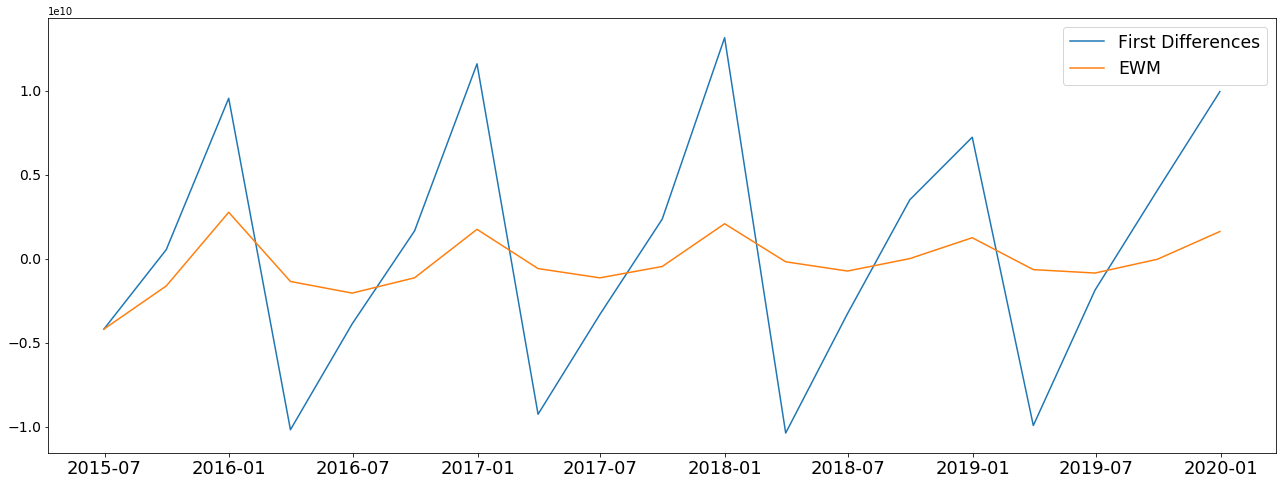

In [35]:
EWMPlot('AAPL', oi)

## Plotting Examples for Visualization (AAPL: Apple) & (AMZN: Amazon)

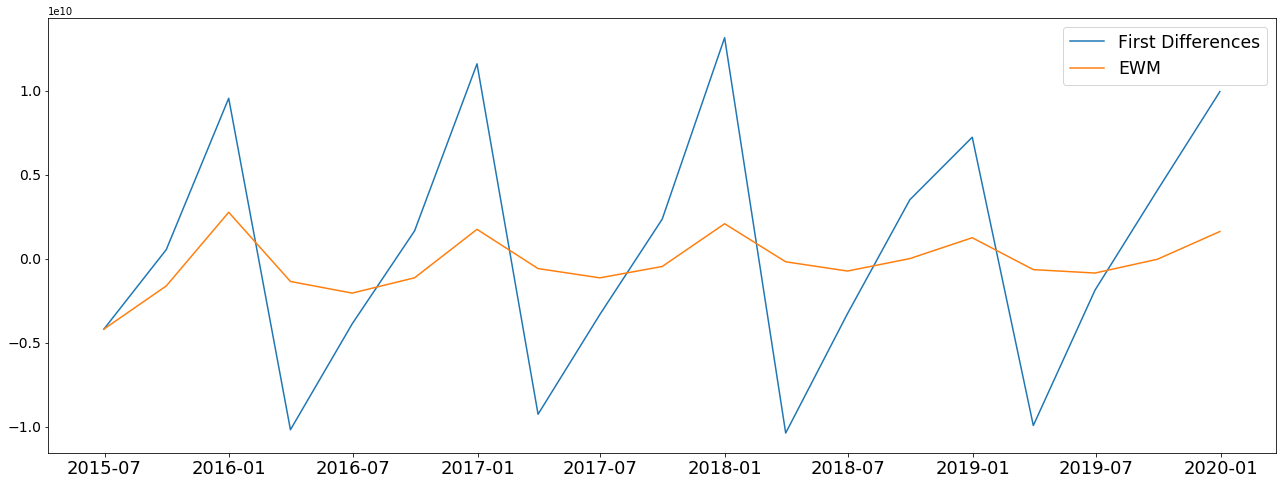

In [36]:
EWMPlot('AAPL', oi)

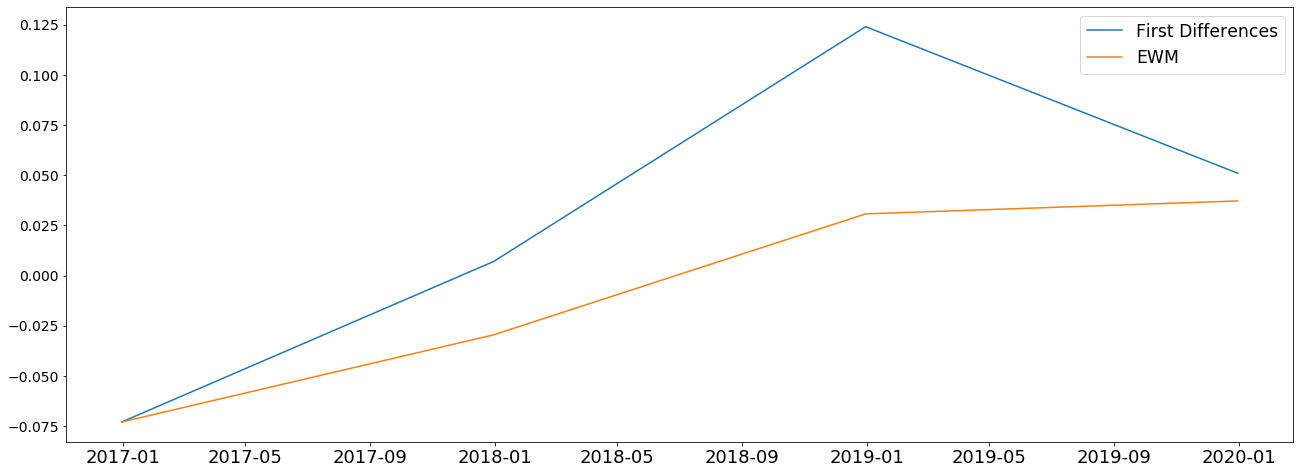

In [37]:
EWMPlotAnnual('AAPL', roe)

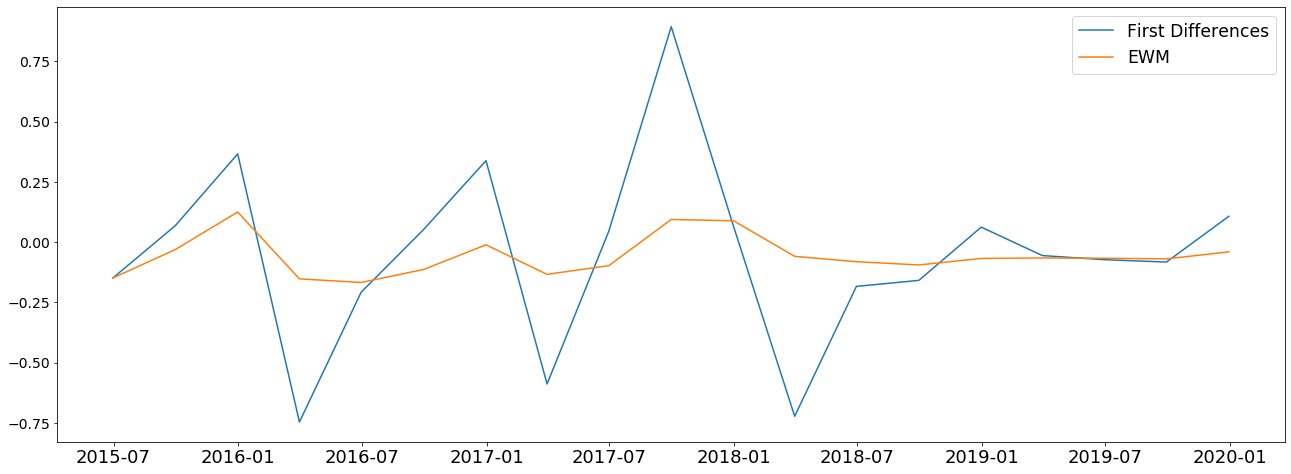

In [38]:
EWMPlot('AMZN', de)

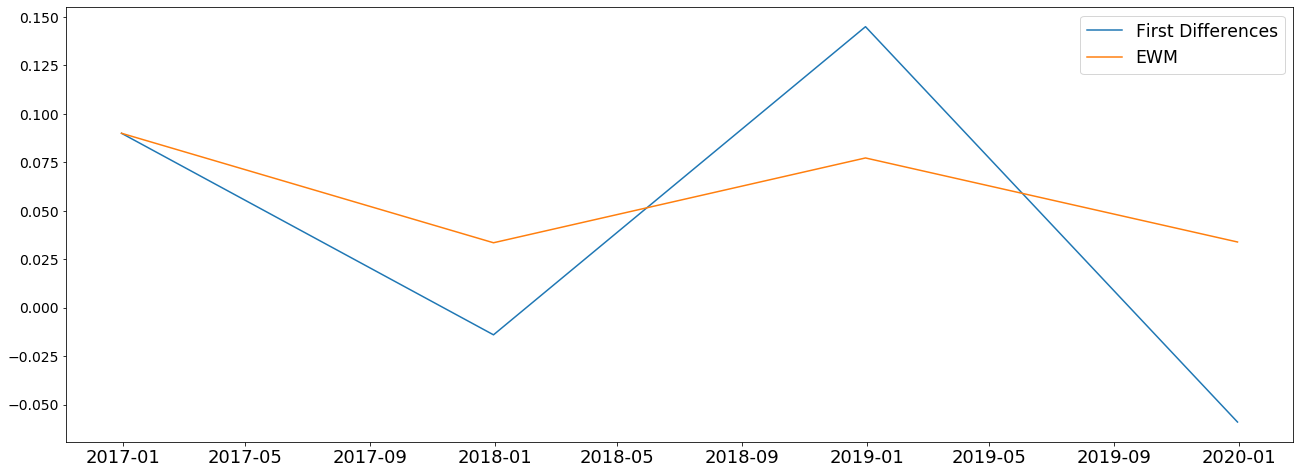

In [39]:
EWMPlotAnnual('AMZN', roe)

# Anomaly Detection - Removing Outliers

## IQR Range Rule Method

Formula = Lower threhsold is (first quartile - (1.5 * IQR)) and maximum threshold is (third quartile + (1.5 * IQR)).

Any value that is below the lower threshold or above the maximum threhsold will be considered an outlier and removed from the data.

In [40]:
def IQROutlierDetection(df):
    
    #creating empty dataframe based on the entered fundamental indicator
    df = pd.DataFrame(df)

    #identifying the thresholds for outlier detection
    first_quartile = df.quantile(0.25)
    third_quartile = df.quantile(0.75)
    IQR = third_quartile - first_quartile
    IQR_mul = IQR*1.5
    max_threshold = third_quartile + IQR_mul
    min_threshold = first_quartile - IQR_mul

    #iterating through the dataframe and deleting any record outside the minimum and maximum thresholds
    for index, row in df.iterrows():
        if (row > max_threshold).all():
            df.drop(index, inplace=True)
        else:
            if (row < min_threshold).all():
                df.drop(index, inplace = True)
                
    return df

In [41]:
#creating separate dataframe to store data output from IQR outlier detection method before proceeding wtih z-score method
final_iqr = final.copy()
del final_iqr['Class']

In [42]:
#checking the number of observations before applying the outlier detection and removal process
len(final_iqr)

2220

{'whiskers': [<matplotlib.lines.Line2D at 0x22d3540efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22d3541b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d3540ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x22d3541bfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d3541bf60>],
 'means': []}

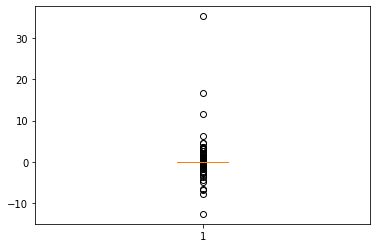

In [43]:
#displaying box plot example of outliers for some of the variables before performing outlier detection
plt.boxplot(final_iqr['DE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22d3544eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x22d3547f7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d35470d30>],
 'medians': [<matplotlib.lines.Line2D at 0x22d3547fe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d3547ff28>],
 'means': []}

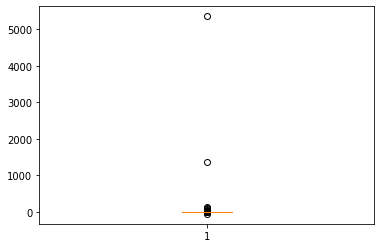

In [44]:
#displaying box plot example of outliers for some of the variables before performing outlier detection
plt.boxplot(final_iqr['BVPS'])

In [45]:
#iterating through every feature in the dataset and applying the outlier detection function to it
for column in final_iqr:
    final_iqr[column] = IQROutlierDetection(final_iqr[column])

In [46]:
#deleting records where anomalies where detected in one of the features
final_iqr = final_iqr.dropna()
len(final_iqr)

387

{'whiskers': [<matplotlib.lines.Line2D at 0x22d350c67f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22d350d70f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d350c66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22d350d7a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d350d7400>],
 'means': []}

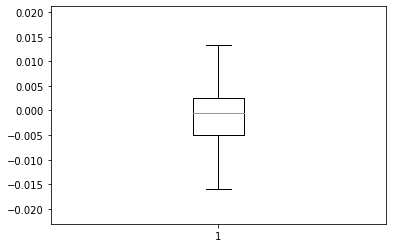

In [47]:
#displaying box plot example of outliers for the same variables as after performing outlier detection
plt.boxplot(final_iqr['DE'], sym = 'none')

{'whiskers': [<matplotlib.lines.Line2D at 0x22d34ffa080>,
 'caps': [<matplotlib.lines.Line2D at 0x22d35010390>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d350108d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22d34b54b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d34b54da0>],
 'means': []}

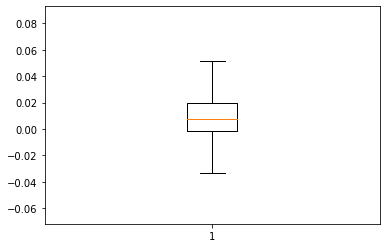

In [48]:
#displaying box plot example of outliers for the same variables as after performing outlier detection
plt.boxplot(final_iqr['BVPS'], sym='none')

# Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
def FeatureScaling(df_column):
    
    #creating separate dataframe for inputted feature
    feature = pd.DataFrame(df_column)
    
    #identifying the list of stock tickers in that dataframe
    ticker_list = feature.index.unique()
    
    #using MinMaxScaler function to perform feature scaling
    scaling = MinMaxScaler(feature_range=(-1,1))
    df_matrix = feature.values.reshape(-1, 1)
    scaled_df = scaling.fit_transform(df_matrix)
    
    #creating new dataframe with the scaled values and their respective stock tickers
    df = pd.DataFrame(scaled_df, index = ticker_list)
    
    return df

In [51]:
#applying feature scaling function to every column in the dataframe
for column in final_iqr:
    final_iqr[column] = FeatureScaling(final_iqr[column])

final_iqr['Class'] = final['Class'].copy()

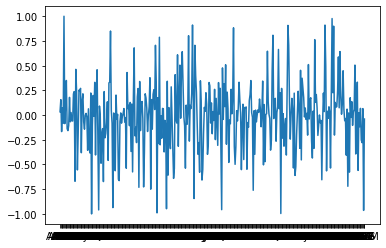

In [52]:
#visualizing an example of the range of data values for a feature after performing feature scaling to confirm its completion
plt.plot(final_iqr['DE'])

# Descriptive Statistics

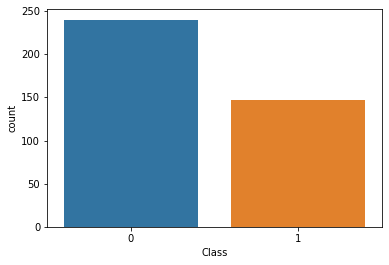

In [53]:
#countplot of target variable
sns.countplot(x = 'Class', data = final_iqr)

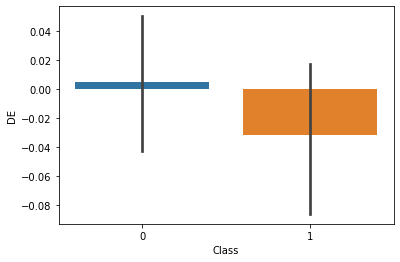

In [54]:
#barplot to visualize relationship between debt-to-equity ratio and target variable
sns.barplot(x = 'Class', y = 'DE', data = final_iqr)

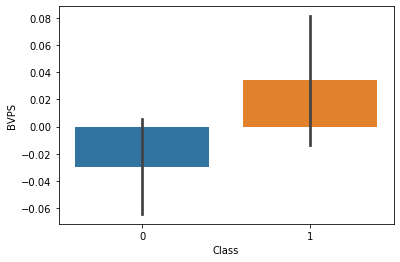

In [55]:
#barplot to visualize relationship between book-value-per-share and target variable
sns.barplot(x = 'Class', y = 'BVPS', data = final_iqr)

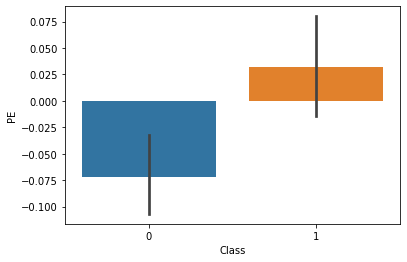

In [56]:
#barplot to visualize relationship between price-to-earnings ratio and target variable
sns.barplot(x = 'Class', y = 'PE', data = final_iqr)

# Train/Test Split

In [57]:
from sklearn.utils import shuffle

In [58]:
#creating separate dataframes for target and independent features before performing train/test split

final_X = final_iqr.copy()

del final_X['Class']

final_y = final_iqr['Class'].copy()

final_y.value_counts()

0    240
1    147
Name: Class, dtype: int64

In [59]:
#creating separate lists for each possible target variable
ones = []
zeroes = []

#iterating through training dataframe and separating positive and negative instances into separate lists
for value in final_y:
    if value == '0':
        zeroes.append(value)
    elif value == '1':
        ones.append(value)
        
#creating markers for extraction of observations in creation of train/test/validation split based on the quantity of
#positive instances available, since it has the lower amount of observations
train_point = 0.7*len(ones)
test_point = train_point + (0.2*len(ones))
val_point = test_point + (0.1*len(ones))

#converting markers to integers
train_point = int(train_point)
test_point = int(test_point)
val_point = int(val_point)

print("Point of extraction for training set is the first number of records from target dataframe:", train_point)
print("Point of extraction for training set is the second number of records from target dataframe:", test_point)
print("Point of extraction for training set is the third number of records from target dataframe:", val_point)

Point of extraction for training set is the first number of records from target dataframe: 102
Point of extraction for training set is the second number of records from target dataframe: 132
Point of extraction for training set is the third number of records from target dataframe: 146


In [60]:
#undersampling to get a better balance for dataset, target is a 50/50 balanced dataset
#since there are only 246 '1' classification labels, 200 '0' and 200 '1' classification labels only will be extracted

#manually taking random sample from dataset to get perfectly balanced training data

final_X = final_iqr.copy()
del final_X['Class']
final_y = final_iqr['Class'].copy()


#shuffling order of dataset to ensure that sample taken is random
final_X, final_y = shuffle(final_X, final_y)

y_df = pd.DataFrame(final_y).copy()
x_df = pd.DataFrame(final_X).copy()

#filtering dataframe to only get records where class label is '0' and another dataframe with class label of '1' only
zeroes = y_df[(y_df.Class == "0")]
ones = y_df[(y_df.Class == "1")]

#extracting appropriate amount of observations from training set based on previously identified markers for
#train/test/validation sets.
#this will be performed on both lists for positive and negative instances simultaneously and then the results will concatted
#to one dataframe as the final dataframe
train_set_y_ones = ones.iloc[:train_point]
train_set_y_zeroes = zeroes.iloc[:train_point]
train_set_y = pd.concat([train_set_y_ones, train_set_y_zeroes], axis=0)

test_set_y_ones = ones.iloc[train_point:test_point]
test_set_y_zeroes = zeroes.iloc[train_point:test_point]
test_set_y = pd.concat([test_set_y_ones, test_set_y_zeroes], axis=0)

val_set_y_ones = ones.iloc[test_point:val_point]
val_set_y_zeroes = zeroes.iloc[test_point:val_point]
val_set_y = pd.concat([val_set_y_ones, val_set_y_zeroes], axis=0)

#identifying the randomly selected stocks to be later extracted for the test set
train_set_ind = train_set_y.index.unique().tolist()
test_set_ind = test_set_y.index.unique().tolist()
val_set_ind = val_set_y.index.unique().tolist()

#extracting the same randomly selected stocks for test set
train_set_x = x_df.loc[train_set_ind]
test_set_x = x_df.loc[test_set_ind]
val_set_x = x_df.loc[val_set_ind]

#combining both train and test sets together
train_set = pd.concat([train_set_x, train_set_y], axis=1)
test_set = pd.concat([test_set_x, test_set_y], axis=1)
val_set = pd.concat([val_set_x, val_set_y], axis=1)


X_train = train_set.copy()
del X_train['Class']
y_train = train_set['Class'].copy()

X_test = test_set.copy()
del X_test['Class']
y_test = test_set['Class'].copy()

X_val = val_set.copy()
del X_val['Class']
y_val = val_set['Class'].copy()

#randomly shuffling the train and test sets one last time
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_val, y_val = shuffle(X_val, y_val)

# Null Accuracy

In [61]:
#counting how many records available for each type of instance in the test data
y_test.value_counts()

1    30
0    30
Name: Class, dtype: int64

In [62]:
#calculate the percentage of zeroes from total
zeroes = (y_test.value_counts().iloc[0]/y_test.value_counts().sum())*100
zeroes

50.0

In [63]:
#calculate the percentage of ones from total
ones = 100 - ((y_test.value_counts().iloc[0]/y_test.value_counts().sum())*100)
ones

50.0

In [64]:
#calculating null accuracy, which in this case is 59.4%
print("Null Accuracy:", max(zeroes, ones))

Null Accuracy: 50.0


If model chose the max. output values and predicted all values to be that output value, the model will have a classification accuracy of 61.4%. The model has to have a higher classification accuracy to be considered efficient. In other words, this will be the baseline model accuracy.

# Building Logistic Regression Model for Comparison

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
logreg = LogisticRegression()
log_model = logreg.fit(X_train, y_train)

In [67]:
#classification accuracy on train set

y_pred = logreg.predict(X_train)
print("Trainset Accuracy:", metrics.accuracy_score(y_train, y_pred))

Trainset Accuracy: 0.6715686274509803


In [68]:
#testing model on test set

y_pred_class = logreg.predict(X_test)
print("Testset Accuracy:", metrics.accuracy_score(y_test, y_pred_class))

Testset Accuracy: 0.55


## Hyperparameter Tuning Logistic Regression

In [69]:
#hyperparameter tuning for logistic regression model

#creating possible hyperparameters for the gridsearch
penalties = ['l2', 'l1', 'elasticnet', 'none']
solvers = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
max_iters = [100, 250, 500, 1000, 2500]
param_grid = dict(penalty = penalties, solver = solvers, max_iter = max_iters)

In [70]:
#performinng the grid search using the above possible hyperparameters with a cross-validation of 5

loggrid = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose = 0)

best_loggrid = loggrid.fit(X_train, y_train)

print(best_loggrid.best_score_, best_loggrid.best_params_)

C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.pe

C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    " got solver={}.".format(solver))
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-te

C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\Selim\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on t

0.6176829268292684 {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [71]:
#testing the performance of the logistic regression model with optimal hyperparameters from the gridsearch
pred_y = best_loggrid.predict(X_test)

target_names = ['Decline', 'Growth']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

     Decline       0.59      0.53      0.56        30
      Growth       0.58      0.63      0.60        30

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60



## Optimally Tuned Logisitc Regression Model

In [72]:
#manual run of the logistic regression model with the optimal hyperparameters
logreg = LogisticRegression(max_iter = 100, penalty = 'l2', solver = 'lbfgs')
log_model = logreg.fit(X_train, y_train)

In [73]:
#classification accuracy on train set

y_pred = logreg.predict(X_train)
print("Trainset Accuracy:", metrics.accuracy_score(y_train, y_pred))

Trainset Accuracy: 0.6715686274509803


In [74]:
#testing model on test set

y_pred_class = logreg.predict(X_test)
print("Testset Accuracy:", metrics.accuracy_score(y_test, y_pred_class))

Testset Accuracy: 0.55


## Confusion Matrix (Logistic Regression)

Classification Rate: 55.00000000000001
Misclassification Rate: 45.0
Recall: 54.54545454545454
Specificity Rate: 50.0
False Negative Rate: 50.0
Precision Score: 54.54545454545454


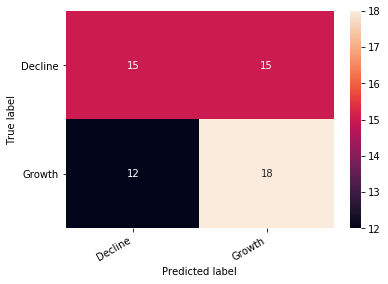

In [75]:
#creating a confusion matrix to assess the performance of the logisitc regression model

classes = ['Decline', 'Growth']

cm = metrics.confusion_matrix(y_test, y_pred_class)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#calculating overall model accuracy

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"Classification Rate:",((TP + TN)/float(TP + TN + FP + FN))*100)
print(f"Misclassification Rate:", ((FP + FN)/float(TP + TN + FP + FN))*100)

#calculating sensitivity rate/true positive rate/recall (actual response value is 'Growth')
#i.e. when actuall value is 'Growth', how often is prediction correct?
print(f"Recall:", ((TP)/float(TP + TN))*100)

#calculating specificity rate
#i.e. how specific/selective the classifier is when prediction 'Growth' values?
print(f"Specificity Rate:", ((TN)/float(TN + FP))*100)

#calculating false positive rate
#i.e. when actual value is 'Decline', how often is the value incorrect?
print(f"False Negative Rate:", ((FP)/float(TN + FP))*100)

#calculating precision score
#i.e. how precise is the classifier when predicting 'Growth' instances?
print(f"Precision Score:", ((TP)/float(TP + FP))*100)

Guide:

Bottom-right: True Positive (TP): correctly predicted 'Growth' stocks

Upper-left: True Negative (TN): correctly predicted 'Decline' stocks

Upper-right: False Positive (FP): incorrectly predicted 'Growth' stocks (Type-1 Error)

Bottom-left: False Negative (FN): incorrectly predicted 'Decline' stocks (Type-2 Error

In [76]:
#calculating f-score

f1 = f1_score(y_test, y_pred_class, pos_label='1')
print("F1 Score is", f1*100)

F1 Score is 57.14285714285713


# Building the Neural Network (attempt 2)

taken from deeplizard YT link: https://www.youtube.com/watch?v=qFJeN9V1ZsI

In [77]:
#imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from ann_visualizer.visualize import ann_viz
from graphviz import Source

import itertools

import matplotlib.pyplot as plt

In [78]:
#creating a numpy array to store numpy arrays of records for the features, which is the required format for the keras
#neural network model

X_train.astype(float)
y_train.astype(float)

feature_values = X_train.values.tolist()
label_values = y_train.values.tolist()


feature_records = []
label_records = []

for x in feature_values:
    feature_records.append(np.array(x))
    
for y in label_values:
    label_records.append(np.array(y))

feature_records = np.array(feature_records)
label_records = np.array(label_records).astype(int).astype(float).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records, label_records = shuffle(feature_records, label_records)

print(label_records.shape, feature_records.shape)
print(label_records.dtype)
print(feature_records.dtype)

(204, 1) (204, 21)
float64
float64


In [79]:
#repeating the same process for the test data for testing model on later

#X_test.astype(float)
#y_test.astype(float)

feature_values_test = X_test.values.tolist()
label_values_test = y_test.values.tolist()


feature_records_test = []
label_records_test = []

for x in feature_values_test:
    feature_records_test.append(np.array(x))
    
for y in label_values_test:
    label_records_test.append(np.array(y))

feature_records_test = np.array(feature_records_test)
label_records_test = np.array(label_records_test).astype(int).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records_test, label_records_test = shuffle(feature_records_test, label_records_test)

print(label_records_test.shape, feature_records_test.shape)
print(label_records_test.dtype)
print(feature_records_test.dtype)

(60, 1) (60, 21)
int32
float64


In [80]:
#repeating the same process for the validation data for cross validation

#X_test.astype(float)
#y_test.astype(float)

feature_values_val = X_val.values.tolist()
label_values_val = y_val.values.tolist()


feature_records_val = []
label_records_val = []

for x in feature_values_val:
    feature_records_val.append(np.array(x))
    
for y in label_values_val:
    label_records_val.append(np.array(y))

feature_records_val = np.array(feature_records_val)
label_records_val = np.array(label_records_val).astype(int).reshape(-1, 1)


#shuffling training dataset so as not to have a randomly generated validation split when it is performed later
#feature_records_val, label_records_val = shuffle(feature_records_val, label_records_val)

print(label_records_val.shape, feature_records_val.shape)
print(label_records_val.dtype)
print(feature_records_val.dtype)

(28, 1) (28, 21)
int32
float64


In [81]:
#sequential models are a linear stack of layers and dense means fully connectd layers
#tanh layer activation function will be used since the sign of the input values is important for the model to learn on
#cross entropy loss function will be used because output values are binary
#Adam optimizer will be used

model = Sequential([
    Dense(units = 16, input_shape = (21,), activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)), 
    Dense(units = 8, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)),
    Dense(units = 4, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l1(0.01)),
    Dense(units = 2, activation = 'softmax', activity_regularizer = tf.keras.regularizers.l1(0.01))
])

monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [82]:
#model 1
mymodel = model.fit(feature_records, label_records, 
                    validation_data=(feature_records_val,label_records_val), batch_size = 10, epochs = 2000, 
                    shuffle = True, verbose = 2, callbacks = [monitor])

print(mymodel)

len(mymodel.history['loss'])

Epoch 1/2000
21/21 - 0s - loss: 1.9475 - accuracy: 0.4265 - val_loss: 1.9822 - val_accuracy: 0.4286
Epoch 2/2000
21/21 - 0s - loss: 1.9340 - accuracy: 0.4216 - val_loss: 1.9723 - val_accuracy: 0.3929
Epoch 3/2000
21/21 - 0s - loss: 1.9217 - accuracy: 0.4167 - val_loss: 1.9609 - val_accuracy: 0.4286
Epoch 4/2000
21/21 - 0s - loss: 1.9092 - accuracy: 0.4265 - val_loss: 1.9517 - val_accuracy: 0.4286
Epoch 5/2000
21/21 - 0s - loss: 1.8983 - accuracy: 0.4265 - val_loss: 1.9423 - val_accuracy: 0.3929
Epoch 6/2000
21/21 - 0s - loss: 1.8874 - accuracy: 0.4216 - val_loss: 1.9335 - val_accuracy: 0.3929
Epoch 7/2000
21/21 - 0s - loss: 1.8777 - accuracy: 0.4216 - val_loss: 1.9244 - val_accuracy: 0.3929
Epoch 8/2000
21/21 - 0s - loss: 1.8680 - accuracy: 0.4216 - val_loss: 1.9165 - val_accuracy: 0.3929
Epoch 9/2000
21/21 - 0s - loss: 1.8587 - accuracy: 0.4314 - val_loss: 1.9088 - val_accuracy: 0.3929
Epoch 10/2000
21/21 - 0s - loss: 1.8497 - accuracy: 0.4363 - val_loss: 1.9011 - val_accuracy: 0.3929

Epoch 83/2000
21/21 - 0s - loss: 1.4351 - accuracy: 0.6029 - val_loss: 1.4724 - val_accuracy: 0.5000
Epoch 84/2000
21/21 - 0s - loss: 1.4304 - accuracy: 0.6029 - val_loss: 1.4674 - val_accuracy: 0.4643
Epoch 85/2000
21/21 - 0s - loss: 1.4257 - accuracy: 0.6176 - val_loss: 1.4621 - val_accuracy: 0.4643
Epoch 86/2000
21/21 - 0s - loss: 1.4210 - accuracy: 0.6029 - val_loss: 1.4573 - val_accuracy: 0.5000
Epoch 87/2000
21/21 - 0s - loss: 1.4164 - accuracy: 0.5980 - val_loss: 1.4525 - val_accuracy: 0.4643
Epoch 88/2000
21/21 - 0s - loss: 1.4118 - accuracy: 0.5980 - val_loss: 1.4479 - val_accuracy: 0.4643
Epoch 89/2000
21/21 - 0s - loss: 1.4073 - accuracy: 0.6029 - val_loss: 1.4430 - val_accuracy: 0.5000
Epoch 90/2000
21/21 - 0s - loss: 1.4027 - accuracy: 0.6029 - val_loss: 1.4383 - val_accuracy: 0.4643
Epoch 91/2000
21/21 - 0s - loss: 1.3982 - accuracy: 0.5931 - val_loss: 1.4335 - val_accuracy: 0.4643
Epoch 92/2000
21/21 - 0s - loss: 1.3937 - accuracy: 0.5980 - val_loss: 1.4289 - val_accurac

Epoch 164/2000
21/21 - 0s - loss: 1.1323 - accuracy: 0.6324 - val_loss: 1.1511 - val_accuracy: 0.5714
Epoch 165/2000
21/21 - 0s - loss: 1.1291 - accuracy: 0.6324 - val_loss: 1.1478 - val_accuracy: 0.6071
Epoch 166/2000
21/21 - 0s - loss: 1.1262 - accuracy: 0.6373 - val_loss: 1.1446 - val_accuracy: 0.6071
Epoch 167/2000
21/21 - 0s - loss: 1.1232 - accuracy: 0.6422 - val_loss: 1.1414 - val_accuracy: 0.6071
Epoch 168/2000
21/21 - 0s - loss: 1.1203 - accuracy: 0.6373 - val_loss: 1.1385 - val_accuracy: 0.6071
Epoch 169/2000
21/21 - 0s - loss: 1.1173 - accuracy: 0.6422 - val_loss: 1.1352 - val_accuracy: 0.6071
Epoch 170/2000
21/21 - 0s - loss: 1.1145 - accuracy: 0.6422 - val_loss: 1.1320 - val_accuracy: 0.6071
Epoch 171/2000
21/21 - 0s - loss: 1.1116 - accuracy: 0.6471 - val_loss: 1.1292 - val_accuracy: 0.6071
Epoch 172/2000
21/21 - 0s - loss: 1.1088 - accuracy: 0.6422 - val_loss: 1.1261 - val_accuracy: 0.6071
Epoch 173/2000
21/21 - 0s - loss: 1.1059 - accuracy: 0.6520 - val_loss: 1.1230 - v

Epoch 245/2000
21/21 - 0s - loss: 0.9458 - accuracy: 0.6618 - val_loss: 0.9566 - val_accuracy: 0.6071
Epoch 246/2000
21/21 - 0s - loss: 0.9439 - accuracy: 0.6569 - val_loss: 0.9549 - val_accuracy: 0.6071
Epoch 247/2000
21/21 - 0s - loss: 0.9420 - accuracy: 0.6569 - val_loss: 0.9530 - val_accuracy: 0.6071
Epoch 248/2000
21/21 - 0s - loss: 0.9405 - accuracy: 0.6569 - val_loss: 0.9513 - val_accuracy: 0.6071
Epoch 249/2000
21/21 - 0s - loss: 0.9387 - accuracy: 0.6569 - val_loss: 0.9494 - val_accuracy: 0.6071
Epoch 250/2000
21/21 - 0s - loss: 0.9369 - accuracy: 0.6569 - val_loss: 0.9475 - val_accuracy: 0.6071
Epoch 251/2000
21/21 - 0s - loss: 0.9351 - accuracy: 0.6569 - val_loss: 0.9459 - val_accuracy: 0.6071
Epoch 252/2000
21/21 - 0s - loss: 0.9334 - accuracy: 0.6569 - val_loss: 0.9442 - val_accuracy: 0.6071
Epoch 253/2000
21/21 - 0s - loss: 0.9317 - accuracy: 0.6569 - val_loss: 0.9425 - val_accuracy: 0.6071
Epoch 254/2000
21/21 - 0s - loss: 0.9301 - accuracy: 0.6618 - val_loss: 0.9408 - v

Epoch 326/2000
21/21 - 0s - loss: 0.8328 - accuracy: 0.6569 - val_loss: 0.8444 - val_accuracy: 0.5000
Epoch 327/2000
21/21 - 0s - loss: 0.8318 - accuracy: 0.6569 - val_loss: 0.8434 - val_accuracy: 0.5000
Epoch 328/2000
21/21 - 0s - loss: 0.8310 - accuracy: 0.6618 - val_loss: 0.8426 - val_accuracy: 0.5000
Epoch 329/2000
21/21 - 0s - loss: 0.8296 - accuracy: 0.6618 - val_loss: 0.8414 - val_accuracy: 0.5000
Epoch 330/2000
21/21 - 0s - loss: 0.8286 - accuracy: 0.6569 - val_loss: 0.8401 - val_accuracy: 0.4643
Epoch 331/2000
21/21 - 0s - loss: 0.8275 - accuracy: 0.6520 - val_loss: 0.8391 - val_accuracy: 0.5000
Epoch 332/2000
21/21 - 0s - loss: 0.8263 - accuracy: 0.6569 - val_loss: 0.8381 - val_accuracy: 0.5000
Epoch 333/2000
21/21 - 0s - loss: 0.8253 - accuracy: 0.6569 - val_loss: 0.8375 - val_accuracy: 0.5000
Epoch 334/2000
21/21 - 0s - loss: 0.8243 - accuracy: 0.6618 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 335/2000
21/21 - 0s - loss: 0.8232 - accuracy: 0.6569 - val_loss: 0.8352 - v

Epoch 407/2000
21/21 - 0s - loss: 0.7705 - accuracy: 0.6520 - val_loss: 0.7849 - val_accuracy: 0.5357
Epoch 408/2000
21/21 - 0s - loss: 0.7700 - accuracy: 0.6520 - val_loss: 0.7843 - val_accuracy: 0.5357
Epoch 409/2000
21/21 - 0s - loss: 0.7695 - accuracy: 0.6520 - val_loss: 0.7839 - val_accuracy: 0.5000
Epoch 410/2000
21/21 - 0s - loss: 0.7690 - accuracy: 0.6569 - val_loss: 0.7836 - val_accuracy: 0.5000
Epoch 411/2000
21/21 - 0s - loss: 0.7685 - accuracy: 0.6569 - val_loss: 0.7830 - val_accuracy: 0.5357
Epoch 412/2000
21/21 - 0s - loss: 0.7681 - accuracy: 0.6569 - val_loss: 0.7824 - val_accuracy: 0.5357
Epoch 413/2000
21/21 - 0s - loss: 0.7675 - accuracy: 0.6520 - val_loss: 0.7820 - val_accuracy: 0.5357
Epoch 414/2000
21/21 - 0s - loss: 0.7671 - accuracy: 0.6569 - val_loss: 0.7817 - val_accuracy: 0.5357
Epoch 415/2000
21/21 - 0s - loss: 0.7669 - accuracy: 0.6569 - val_loss: 0.7811 - val_accuracy: 0.5357
Epoch 416/2000
21/21 - 0s - loss: 0.7661 - accuracy: 0.6569 - val_loss: 0.7809 - v

Epoch 488/2000
21/21 - 0s - loss: 0.7437 - accuracy: 0.6471 - val_loss: 0.7601 - val_accuracy: 0.5000
Epoch 489/2000
21/21 - 0s - loss: 0.7435 - accuracy: 0.6618 - val_loss: 0.7599 - val_accuracy: 0.5000
Epoch 490/2000
21/21 - 0s - loss: 0.7432 - accuracy: 0.6618 - val_loss: 0.7596 - val_accuracy: 0.5000
Epoch 491/2000
21/21 - 0s - loss: 0.7429 - accuracy: 0.6569 - val_loss: 0.7595 - val_accuracy: 0.5000
Epoch 492/2000
21/21 - 0s - loss: 0.7427 - accuracy: 0.6520 - val_loss: 0.7591 - val_accuracy: 0.5000
Epoch 493/2000
21/21 - 0s - loss: 0.7425 - accuracy: 0.6520 - val_loss: 0.7590 - val_accuracy: 0.5000
Epoch 494/2000
21/21 - 0s - loss: 0.7422 - accuracy: 0.6569 - val_loss: 0.7587 - val_accuracy: 0.5000
Epoch 495/2000
21/21 - 0s - loss: 0.7420 - accuracy: 0.6520 - val_loss: 0.7584 - val_accuracy: 0.5000
Epoch 496/2000
21/21 - 0s - loss: 0.7418 - accuracy: 0.6520 - val_loss: 0.7583 - val_accuracy: 0.5000
Epoch 497/2000
21/21 - 0s - loss: 0.7415 - accuracy: 0.6471 - val_loss: 0.7581 - v

Epoch 569/2000
21/21 - 0s - loss: 0.7269 - accuracy: 0.6520 - val_loss: 0.7464 - val_accuracy: 0.5357
Epoch 570/2000
21/21 - 0s - loss: 0.7267 - accuracy: 0.6569 - val_loss: 0.7464 - val_accuracy: 0.5357
Epoch 571/2000
21/21 - 0s - loss: 0.7265 - accuracy: 0.6569 - val_loss: 0.7464 - val_accuracy: 0.5357
Epoch 572/2000
21/21 - 0s - loss: 0.7264 - accuracy: 0.6569 - val_loss: 0.7461 - val_accuracy: 0.5357
Epoch 573/2000
21/21 - 0s - loss: 0.7262 - accuracy: 0.6520 - val_loss: 0.7458 - val_accuracy: 0.5357
Epoch 574/2000
21/21 - 0s - loss: 0.7259 - accuracy: 0.6569 - val_loss: 0.7456 - val_accuracy: 0.5357
Epoch 575/2000
21/21 - 0s - loss: 0.7257 - accuracy: 0.6520 - val_loss: 0.7456 - val_accuracy: 0.5357
Epoch 576/2000
21/21 - 0s - loss: 0.7255 - accuracy: 0.6520 - val_loss: 0.7454 - val_accuracy: 0.5357
Epoch 577/2000
21/21 - 0s - loss: 0.7253 - accuracy: 0.6520 - val_loss: 0.7454 - val_accuracy: 0.5357
Epoch 578/2000
21/21 - 0s - loss: 0.7251 - accuracy: 0.6520 - val_loss: 0.7452 - v

Epoch 650/2000
21/21 - 0s - loss: 0.7135 - accuracy: 0.6716 - val_loss: 0.7394 - val_accuracy: 0.5357
Epoch 651/2000
21/21 - 0s - loss: 0.7133 - accuracy: 0.6716 - val_loss: 0.7391 - val_accuracy: 0.5357
Epoch 652/2000
21/21 - 0s - loss: 0.7133 - accuracy: 0.6667 - val_loss: 0.7394 - val_accuracy: 0.5357
Epoch 653/2000
21/21 - 0s - loss: 0.7130 - accuracy: 0.6667 - val_loss: 0.7394 - val_accuracy: 0.5357
Epoch 654/2000
21/21 - 0s - loss: 0.7129 - accuracy: 0.6716 - val_loss: 0.7391 - val_accuracy: 0.5357
Epoch 655/2000
21/21 - 0s - loss: 0.7128 - accuracy: 0.6667 - val_loss: 0.7392 - val_accuracy: 0.5357
Epoch 656/2000
21/21 - 0s - loss: 0.7125 - accuracy: 0.6667 - val_loss: 0.7389 - val_accuracy: 0.5357
Epoch 657/2000
21/21 - 0s - loss: 0.7125 - accuracy: 0.6667 - val_loss: 0.7389 - val_accuracy: 0.5357
Epoch 658/2000
21/21 - 0s - loss: 0.7123 - accuracy: 0.6667 - val_loss: 0.7389 - val_accuracy: 0.5357
Epoch 659/2000
21/21 - 0s - loss: 0.7121 - accuracy: 0.6716 - val_loss: 0.7384 - v

Epoch 731/2000
21/21 - 0s - loss: 0.7049 - accuracy: 0.6814 - val_loss: 0.7380 - val_accuracy: 0.5357
Epoch 732/2000
21/21 - 0s - loss: 0.7047 - accuracy: 0.6765 - val_loss: 0.7380 - val_accuracy: 0.5357
Epoch 733/2000
21/21 - 0s - loss: 0.7046 - accuracy: 0.6814 - val_loss: 0.7381 - val_accuracy: 0.5357
Epoch 734/2000
21/21 - 0s - loss: 0.7045 - accuracy: 0.6814 - val_loss: 0.7381 - val_accuracy: 0.5357
Epoch 735/2000
21/21 - 0s - loss: 0.7045 - accuracy: 0.6814 - val_loss: 0.7381 - val_accuracy: 0.5357
Epoch 736/2000
21/21 - 0s - loss: 0.7043 - accuracy: 0.6814 - val_loss: 0.7379 - val_accuracy: 0.5357
Epoch 737/2000
21/21 - 0s - loss: 0.7042 - accuracy: 0.6716 - val_loss: 0.7380 - val_accuracy: 0.5357
Epoch 738/2000
21/21 - 0s - loss: 0.7041 - accuracy: 0.6765 - val_loss: 0.7381 - val_accuracy: 0.5357
Epoch 739/2000
21/21 - 0s - loss: 0.7040 - accuracy: 0.6814 - val_loss: 0.7381 - val_accuracy: 0.5357
Epoch 740/2000
21/21 - 0s - loss: 0.7039 - accuracy: 0.6814 - val_loss: 0.7380 - v

Epoch 812/2000
21/21 - 0s - loss: 0.6961 - accuracy: 0.6863 - val_loss: 0.7344 - val_accuracy: 0.5357
Epoch 813/2000
21/21 - 0s - loss: 0.6960 - accuracy: 0.6912 - val_loss: 0.7346 - val_accuracy: 0.5357
Epoch 814/2000
21/21 - 0s - loss: 0.6958 - accuracy: 0.6863 - val_loss: 0.7349 - val_accuracy: 0.5357
Epoch 815/2000
21/21 - 0s - loss: 0.6957 - accuracy: 0.6863 - val_loss: 0.7346 - val_accuracy: 0.5357
Epoch 816/2000
21/21 - 0s - loss: 0.6956 - accuracy: 0.6863 - val_loss: 0.7349 - val_accuracy: 0.5357
Epoch 817/2000
21/21 - 0s - loss: 0.6954 - accuracy: 0.6863 - val_loss: 0.7348 - val_accuracy: 0.5357
Epoch 818/2000
21/21 - 0s - loss: 0.6953 - accuracy: 0.6912 - val_loss: 0.7348 - val_accuracy: 0.5357
Epoch 819/2000
21/21 - 0s - loss: 0.6952 - accuracy: 0.6912 - val_loss: 0.7349 - val_accuracy: 0.5357
Epoch 820/2000
21/21 - 0s - loss: 0.6950 - accuracy: 0.6912 - val_loss: 0.7347 - val_accuracy: 0.5357
Epoch 821/2000
21/21 - 0s - loss: 0.6950 - accuracy: 0.6912 - val_loss: 0.7348 - v

846

In [83]:
#testing on test set

predictions = model.predict(feature_records_test, batch_size = 10, verbose = 0)

rounded_predictions = np.argmax(predictions, axis = -1)

target_names = ['Decline', 'Growth']
print(classification_report(label_records_test, rounded_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Decline       0.58      0.60      0.59        30
      Growth       0.59      0.57      0.58        30

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60



## Hyperparameter Tuning

In [84]:
def NNmodel(layers, activation):
    
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim  = feature_records.shape[1]))
            model.add(Activation(activation))
            model.add(Dense(nodes))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(units = 2, activation = 'softmax'))
    
    monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

    model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
    
    return model

NNmodel = KerasClassifier(build_fn=NNmodel, verbose = 0)

In [85]:
layers = [(16, 8), (32, 16, 8), (32, 16, 8, 4), (16, 8, 4), (8, 4, 2), (8, 4)]
activations = ['sigmoid', 'relu', 'elu']
param_grid = dict(layers = layers, activation = activations, batch_size = [5, 10, 20, 30])

In [ ]:
nn_grid = GridSearchCV(estimator = NNmodel, param_grid = param_grid, cv = 5)

best_nngrid = nn_grid.fit(feature_records, label_records)

pred_y_grid = best_nngrid.predict(feature_records_test)

In [ ]:
print(best_nngrid.best_score_, best_nngrid.best_params_)

## Optimally Tuned Neural Network

In [ ]:
#sequential models are a linear stack of layers and dense means fully connectd layers
#tanh layer activation function will be used since the sign of the input values is important for the model to learn on
#cross entropy loss function will be used because output values are binary
#Adam optimizer will be used

model = Sequential([
    Dense(units = 8, input_shape = (21,), activation = 'elu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 4, activation = 'elu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 2, activation = 'softmax')
])

monitor = EarlyStopping(monitor='val_loss', patience = 20, 
                        min_delta = 0, verbose = 1, 
                        mode = 'auto', restore_best_weights=True)

model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

In [ ]:
#model 1
mymodel = model.fit(feature_records, label_records, 
                    validation_data=(feature_records_val,label_records_val), batch_size =30, epochs = 2000, 
                    shuffle = True, verbose = 2, callbacks = [monitor])

print(mymodel)

len(mymodel.history['loss'])

In [ ]:
#testing by making predictions on test data

predictions = model.predict(feature_records_test, batch_size = 5, verbose = 0)

rounded_predictions = np.argmax(predictions, axis = -1)

#create confusion matrix to visualize model classification accuracy on the test data
classes = ['Decline', 'Growth']

cm = confusion_matrix(y_true = label_records_test, y_pred = rounded_predictions)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"Classification Rate:",((TP + TN)/float(TP + TN + FP + FN))*100)
print(f"Misclassification Rate:", ((FP + FN)/float(TP + TN + FP + FN))*100)

#calculating sensitivity rate/true positive rate/recall (actual response value is 'Growth')
#i.e. when actuall value is 'Growth', how often is prediction correct?
print(f"Recall:", ((TP)/float(TP + TN))*100)

#calculating specificity rate
#i.e. how specific/selective the classifier is when prediction 'Growth' values?
print(f"Specificity Rate:", ((TN)/float(TN + FP))*100)

#calculating false positive rate
#i.e. when actual value is 'Decline', how often is the value incorrect?
print(f"False Negative Rate:", ((FP)/float(TN + FP))*100)

#calculating precision score
#i.e. how precise is the classifier when predicting 'Growth' instances?
print(f"Precision Score:", ((TP)/float(TP + FP))*100)

Guide:

Bottom-right: True Positive (TP): correctly predicted 'Growth' stocks

Upper-left: True Negative (TN): correctly predicted 'Decline' stocks

Upper-right: False Positive (FP): incorrectly predicted 'Growth' stocks (Type-1 Error)

Bottom-left: False Negative (FN): incorrectly predicted 'Decline' stocks (Type-2 Error

In [ ]:
#calculating f-score

f1 = f1_score(label_records_test, rounded_predictions)
print("F1 Score is", f1*100)

In [ ]:
#AUC Score and ROC Curve for both models

lr_probs = logreg.predict_proba(X_test)
nn_probs = model.predict_proba(feature_records_test)

In [ ]:
class_one_prob_nn = []

for zeroes, ones in nn_probs:
    class_one_prob_nn.append(ones)
    
class_one_prob_lr = []

for zeroes, ones in lr_probs:
    class_one_prob_lr.append(ones)

In [ ]:
#calculating roc score

lr_roc = roc_auc_score(y_test, class_one_prob_lr)

nn_roc = roc_auc_score(label_records_test, class_one_prob_nn)

print("Neural Network AUROC:", nn_roc*100, "Logistic Regression AUROC:", lr_roc*100)

In [ ]:
nn_fpr, nn_tpr, _ = roc_curve(label_records_test, class_one_prob_nn)
lg_fpr, lg_tpr, _ = roc_curve(label_records_test, class_one_prob_lr)

plt.plot(nn_fpr, nn_tpr, linestyle = '--', label = 'Neural Network (AUROC = %f)' % nn_roc)
plt.plot(lg_fpr, lg_tpr, linestyle = '--', label = 'Logistic Regression (AUROC = %f)' % lr_roc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#creating copies of needed elements for roc curve for neural network ewm method to export to other python sheet with alt.
#model for creating ROC plot between both NN models

label_records_test_ewm = label_records_test.copy()
rounded_predictions_ewm = class_one_prob_nn.copy()


np.savetxt('labelrecords.csv', label_records_test_ewm, delimiter=',')
np.savetxt('classoneprobnn.csv', rounded_predictions_ewm, delimiter=',')

## Input Sensitivity Analysis

In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.DeepExplainer(model, feature_records)

In [ ]:
shap_values = explainer.shap_values(feature_records_test)

In [ ]:
feature_names = X_test.columns

feature_names = np.array(feature_names)

shap.summary_plot(shap_values, feature_records_test, feature_names = feature_names)

In [ ]:
#BVPS dependence plot for class label 1

shap.dependence_plot("BVPS", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#PS dependence plot

shap.dependence_plot("PS", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#NCFO dependence plot

shap.dependence_plot("NCFO", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#PB dependence plot

shap.dependence_plot("PB", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#bottom 3

#FCFPS dependence plot

shap.dependence_plot("FCFPS", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#ROA dependence plot

shap.dependence_plot("ROA", shap_values[1], feature_records_test, feature_names = feature_names)

In [ ]:
#bottom 3

#OPEX dependence plot

shap.dependence_plot("OPEX", shap_values[1], feature_records_test, feature_names = feature_names)

## Saving Neural Network Model

In [ ]:
#saving and loading model for future use if required

import os.path
from tensorflow.keras.models import load_model

#if os.path.isfile('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5') is False:
model.save('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5')

In [ ]:
#loading model
NN_model = load_model('C:\\Users\\Selim\\Desktop\\Masters\\Final Project\\Datasets\\dissertationNN.h5')

In [ ]:
NN_model.summary()

In [ ]:
NN_model.get_weights()

In [ ]:
NN_model.optimizer

In [ ]:
#saving model architecture only for comparison between various models
from tensorflow.keras.models import model_from_json

json_string = model.to_json()
json_string

In [ ]:
model_architecture = model_from_json(json_string)
model_architecture.summary()

In [ ]:
NN_model.output